In [9]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [25]:
(X_train, Y_train),(X_test, Y_test)=keras.datasets.mnist.load_data()

In [26]:
len(Y_train)

60000

In [28]:
#scaling to improve the accuracy
X_train =X_train/255 #cuz the arraay lies btw 1 to 255
X_test=X_test/255

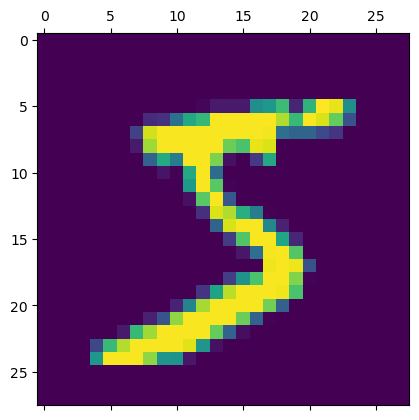

In [14]:
plt.matshow(X_train[0])

In [32]:
flattened_train=X_train.reshape(len(X_train),28*28)
flattened_test=X_test.reshape(len(X_test),28*28)
flattened_test.shape

(10000, 784)

In [33]:
#creating a simple neuron network-2 layers only-input n output layer
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)
model.fit(flattened_train,Y_train, epochs=5)
#if the accuracy comes out to be less it means that the values arent scaled

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4700 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9252


In [34]:
 model.evaluate(flattened_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9269


[0.26589417457580566, 0.9269000291824341]

In [36]:
predicted_vals=model.predict(flattened_test) #needs to be stroed in an array
predicted_vals[0] #returns the 10 scores of each neuron n need the max score using numpy

313/313 [==============================] - 0s 1ms/step


array([2.1909434e-02, 3.2880141e-07, 7.4372612e-02, 9.5941746e-01,
       1.7121987e-03, 1.1505837e-01, 2.1715077e-06, 9.9984872e-01,
       1.4156894e-01, 6.5744162e-01], dtype=float32)

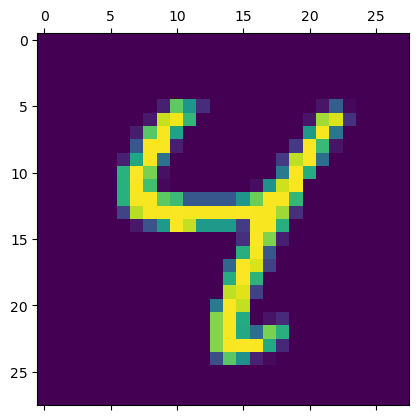

In [40]:
plt.matshow(X_test[6])

In [41]:
np.argmax(predicted_vals[6]) #gives back the index hence the correct answeer

4

In [42]:
y_predicted_labels=[np.argmax(i) for i in predicted_vals]
y_predicted_labels[:5] #to use confusion matrix we need to convert the predicted values array which gives the each neuron output 
#to the array or list containing the right answer only

[7, 2, 1, 0, 4]

In [43]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    4,    8,    2,    3,    1],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   4,    8,  926,   15,    8,    3,   13,   11,   41,    3],
       [   4,    0,   21,  907,    0,   31,    3,   14,   24,    6],
       [   1,    1,    2,    2,  913,    0,   13,    4,   11,   35],
       [  10,    2,    2,   21,   10,  776,   21,    9,   34,    7],
       [   7,    3,    5,    0,    7,    9,  922,    2,    3,    0],
       [   1,    5,   24,    2,    5,    1,    0,  963,    4,   23],
       [   5,    7,    7,   16,    9,   18,   10,   12,  884,    6],
       [   9,    7,    2,    9,   24,    6,    0,   28,   12,  912]],
      dtype=int32)>

In [47]:
#using a hidden layer
model= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),  #100=number of neurons in hidden layer
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)
model.fit(flattened_train,Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2732 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1237 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9844


In [49]:
model.evaluate(flattened_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9756


[0.08158828318119049, 0.975600004196167]

In [ ]:
#not using flattned_train instead we use keras flatten
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28))
    keras.layers.Dense(100,activation='relu'),  #100=number of neurons in hidden layer
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)
model.fit(X_train,Y_train, epochs=5)